#  Phylogenetics Quickstart Guide

In [1]:
import phylogenetics as phy
import phylogenetics.tools as tools
import phylopandas as ph
import pandas as pd

In [2]:
# initialize project, create data folder
project = phy.PhylogeneticsProject(project_dir='project1', overwrite=True)

# read in initial seed sequence(s) for BLASTing
project.read_data(path="md2_seed_sequence.txt", schema="fasta")

# Run NCBI blast (default protein, 100 hits, e-value cutoff = 0.01)
project.compute_blast(hitlist_size=100)

# Cluster redundant sequences w/ cdhit
project.compute_clusters()

# Align sequences w/ muscle
project.compute_alignment()

# Curate alignment w/ Gblocks
project.compute_gblocks()

# Compute tree using PhyML
project.compute_tree()

# Reconstruct ancestral proteins using PAML
project.compute_reconstruction()

Running blast...
Writing BLAST results to project1/0_blast_output.csv...Done.

Computing clusters...
Writing clustering results to project1/1_clustering_output.csv...Done.

Computing alignment...
Writing alignment results to project1/2_alignment_output.csv...Done.

Computing gblocks...
Gblocks reduced the number of columns from 171 to 155.

Writing gblocks results to project1/3_gblocks_alignment_output.csv...Done.

Computing tree...
Writing tree results to project1/4_tree_output.csv...Done.

Computing reconstruction...
Writing reconstruction results to project1/5_reconstruction_output.csv...Done.



In [3]:
# View data in phylopandas dataframe object
project.data.head()

,accession,hit_def,hit_id,title,length,e_value,subject_start,subject_end,query_start,query_end,...,type,id,parent,label,distance,reconstruct_label,ml_sequence,ml_posterior,alt_sequence,alt_posterior
0,NP_056179,lymphocyte antigen 96 isoform 1 precursor [Hom...,ref|NP_056179.4|,ref|NP_056179.4| lymphocyte antigen 96 isoform...,0.0873018,2.75215e-114,1,160,12,171,...,leaf,ilVU9UwgAP,0,ilVU9UwgAP,0.0873018,ilVU9UwgAP,None,None,None,None
1,XP_017377398,PREDICTED: lymphocyte antigen 96 isoform X1 [C...,ref|XP_017377398.1|,ref|XP_017377398.1| PREDICTED: lymphocyte anti...,0.0790489,1.04738e-100,1,160,12,171,...,leaf,lJwKPM7ZPG,0,lJwKPM7ZPG,0.0790489,lJwKPM7ZPG,None,None,None,None
2,XP_003800091,lymphocyte antigen 96 isoform X1 [Otolemur gar...,ref|XP_003800091.1|,ref|XP_003800091.1| lymphocyte antigen 96 isof...,0.101673,1.59792e-91,1,158,12,169,...,leaf,FnsYyKBNTX,6,FnsYyKBNTX,0.348245,FnsYyKBNTX,None,None,None,None
3,XP_004462521,lymphocyte antigen 96 [Dasypus novemcinctus],ref|XP_004462521.1|,ref|XP_004462521.1| lymphocyte antigen 96 [Das...,0.146163,2.34424e-86,1,160,12,171,...,leaf,bn1c2lrHOZ,32,bn1c2lrHOZ,0.394918,bn1c2lrHOZ,None,None,None,None
4,XP_017521951,PREDICTED: lymphocyte antigen 96 [Manis javanica],ref|XP_017521951.1|,ref|XP_017521951.1| PREDICTED: lymphocyte anti...,0.159135,9.85583e-86,1,160,12,171,...,leaf,tQAyhsuQ6Z,18,tQAyhsuQ6Z,0.448871,tQAyhsuQ6Z,None,None,None,None


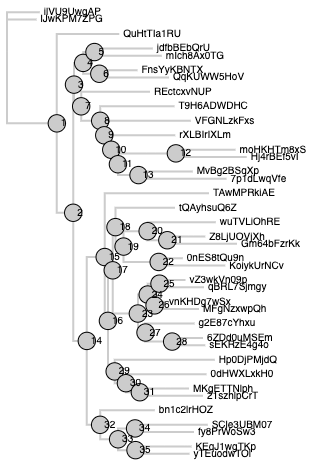

In [4]:
# Visualize tree and ancestors using phylovega

from phylovega import TreeChart

# Construct Vega Specification
chart = TreeChart.from_phylopandas(
    project.data,
    height_scale=300,

    # Node attributes
    node_size=300,
    node_color="#ccc",

    # Leaf attributes
    leaf_labels="id",

    # Edge attributes
    edge_width=2,
    edge_color="#000",
)

chart